### 3251-07 Statistics for Data Science - Group 4 Project
#### Predict House Prices - King County, USA Housing Sales Data
#### Group Members: William Andrews, Shaikh Asif, Maria Qamar, Shatamjeev Dewan

##  Data Cleansing and Transformations

In [977]:
# Import Libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
from IPython.display import Image
import calendar

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics import utils
import math

import warnings
warnings.filterwarnings('ignore')

In [404]:
# Data source: https://www.kaggle.com/harlfoxem/housesalesprediction/data

# Read data:
KingCounty = pd.read_csv('kc_house_data.csv',sep=',')

# Data Preview
KingCounty.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [405]:
# Review data statistics
KingCounty.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [406]:
# Data Transformation Function Definitions:

def IsRenovated(x):
    if x != 0:
         return 1 
    else: 
        return 0
    
# From describe() above, need HasBasement as not all houses have basements (when sqft_basement = 0)
def HasBasement(x):
    if x != 0:
         return 1 
    else: 
        return 0    

def YearsAgoRenovated(x):
    year_sold, year_renovated = x
    if year_renovated == 0:
        return 0
    else:
        return year_sold - year_renovated
    
def Season(month):
    if month == 'Dec' or month == 'Jan' or month == 'Feb':
        return 'Winter'
    elif month == 'Mar' or month == 'Apr' or month == 'May':
        return 'Spring'
    elif month == 'Jun' or month == 'Jul' or month == 'Aug':
        return 'Summer'
    else:
        return 'Fall'

In [407]:
# Data Transformations:

# Convert date column to datetime format
KingCounty['date'] = KingCounty['date'].apply(pd.to_datetime)

# Derive Year, Month and Day
KingCounty['year_sold'] = KingCounty['date'].apply(lambda x: x.year)
KingCounty['month_sold'] = KingCounty['date'].apply(lambda x: x.month)
KingCounty['month_name_sold'] = KingCounty['month_sold'].apply(lambda x: calendar.month_abbr[x])
KingCounty['day_of_month_sold'] = KingCounty['date'].apply(lambda x: x.day)
KingCounty['day_of_week_sold'] = KingCounty['date'].apply(lambda x: x.weekday())
KingCounty['dayname_of_week_sold'] = KingCounty['day_of_week_sold'].apply(lambda x: calendar.day_abbr[x])

# Age of house
KingCounty['years_ago_built'] = KingCounty['date'].apply(lambda x: x.year) - KingCounty['yr_built']

# Flag for if house was renovated                                                                         
KingCounty['renovated'] = KingCounty['yr_renovated'].apply(IsRenovated)
                                                                          
# Age of house renovation
KingCounty['years_ago_renovated'] =  KingCounty[['year_sold','yr_renovated']].apply(YearsAgoRenovated,axis=1)

# Flag for if house has a basement
KingCounty['basement'] = KingCounty['sqft_basement'].apply(HasBasement)

# Season house sold in
KingCounty['season'] = KingCounty['month_name_sold'].apply(Season)

In [408]:
# Check for any nulls:
print(KingCounty.isnull().any())

id                      False
date                    False
price                   False
bedrooms                False
bathrooms               False
sqft_living             False
sqft_lot                False
floors                  False
waterfront              False
view                    False
condition               False
grade                   False
sqft_above              False
sqft_basement           False
yr_built                False
yr_renovated            False
zipcode                 False
lat                     False
long                    False
sqft_living15           False
sqft_lot15              False
year_sold               False
month_sold              False
month_name_sold         False
day_of_month_sold       False
day_of_week_sold        False
dayname_of_week_sold    False
years_ago_built         False
renovated               False
years_ago_renovated     False
basement                False
season                  False
dtype: bool


##  Data Analysis

 - Analyze the relationship of the variables with the response variable price using plots
 - Check for any significant outliers
 - Check for collinearity using a correlation matrix

In [409]:
# The date variables will be removed from the dataset as they were used to derive the season, age of house and renovation
# variables and will not be used for this analysis. 

# The id variable will also be removed because it is not related to house price

KingCounty = KingCounty.drop(['date', 'year_sold', 'month_sold', 'month_name_sold', 'day_of_month_sold'], axis=1)
KingCounty = KingCounty.drop(['day_of_week_sold', 'dayname_of_week_sold', 'yr_built', 'yr_renovated', 'id'], axis=1)

### Plots for Continous Variables

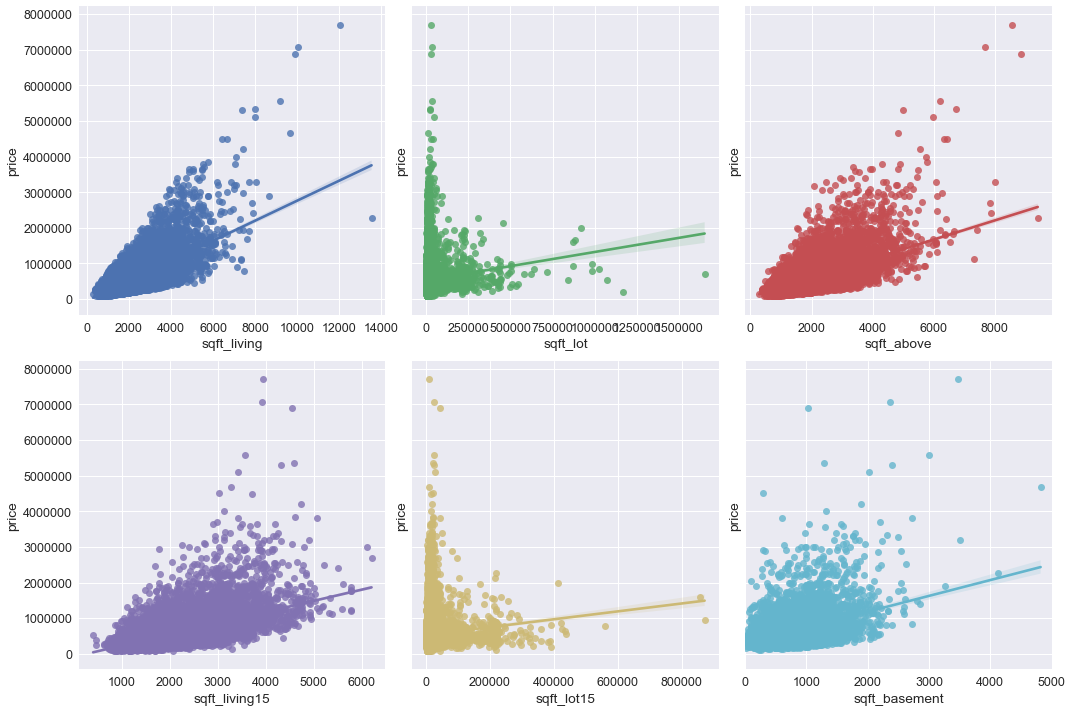

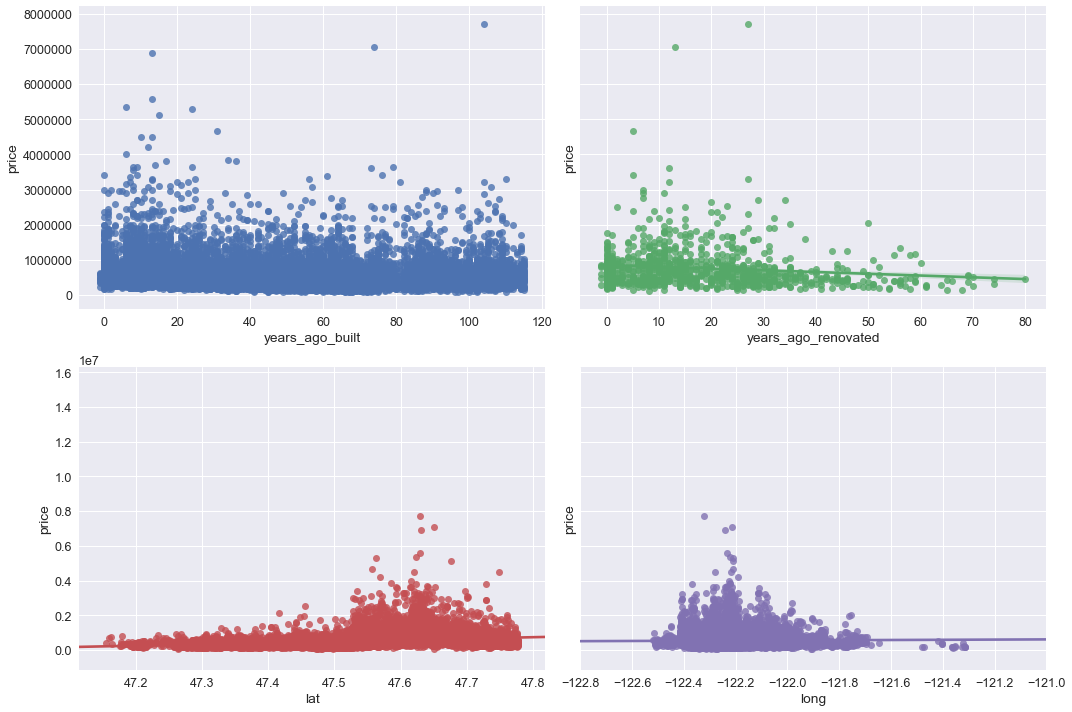

In [410]:
# Plots for continous variables

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey='row', figsize=(15,10))
sns.regplot(x="sqft_living", y="price", data=KingCounty, truncate=True, ax=ax1)
sns.regplot(x="sqft_lot", y="price", data=KingCounty, truncate=True, ax=ax2)
sns.regplot(x="sqft_above", y="price", data=KingCounty, truncate=True, ax=ax3)
sns.regplot(x="sqft_living15", y="price", data=KingCounty, truncate=True, ax=ax4)
sns.regplot(x="sqft_lot15", y="price", data=KingCounty, truncate=True, ax=ax5)
sns.regplot(x="sqft_basement", y="price", data=KingCounty.query("basement != 0"), truncate=True, ax=ax6)
plt.xlim(5,5000)

fig.tight_layout()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', figsize=(15,10))
sns.regplot(x="years_ago_built", y="price", data=KingCounty, truncate=True, ax=ax1)
sns.regplot(x="years_ago_renovated", y="price", data=KingCounty.query("renovated != 0"), truncate=True, ax=ax2)
sns.regplot(x="lat", y="price", data=KingCounty, ax=ax3)
sns.regplot(x="long", y="price", data=KingCounty, ax=ax4)
plt.xlim(-122.8,-121)

fig.tight_layout()

#### We can observe that sqft_living, sqft_above, sqft_living15 (avg sqft_living of 15 neighbourhood houses), sqft_basement (when basement present), years_ago_renovated and lat are approximately linearly correlated to price.  
 
#### There are a few significant outliers for these linearly correlated variables which could skew the regression. During the regression stage, we will determine if removing these outliers would improve model performance.

### Plots for Categorical Variables

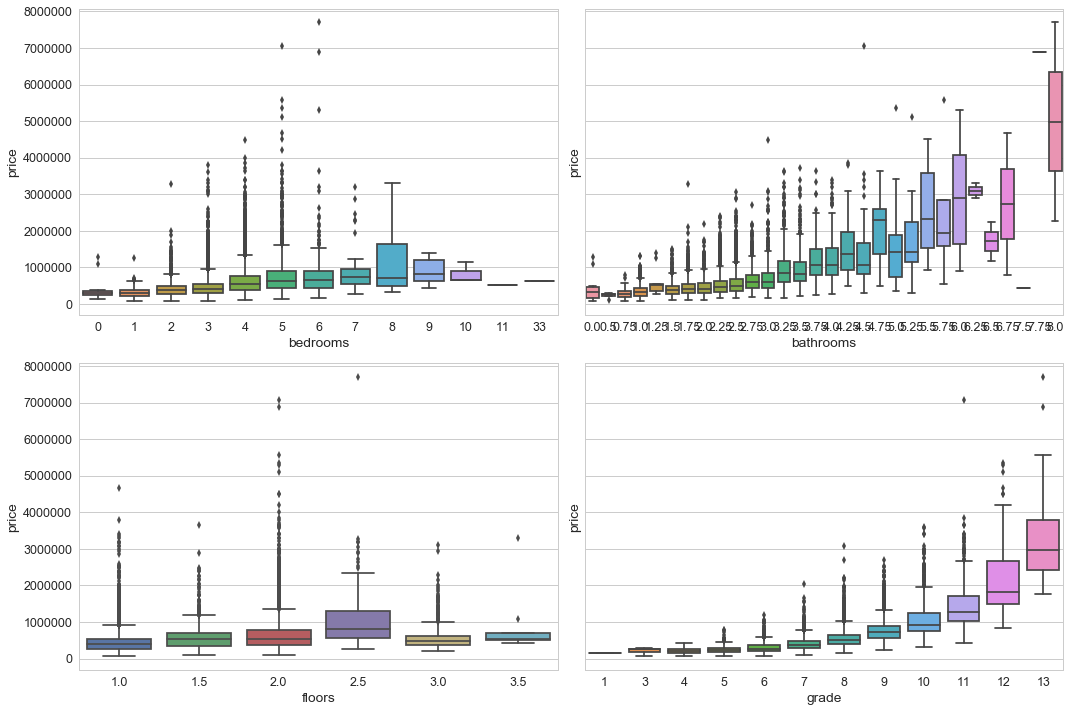

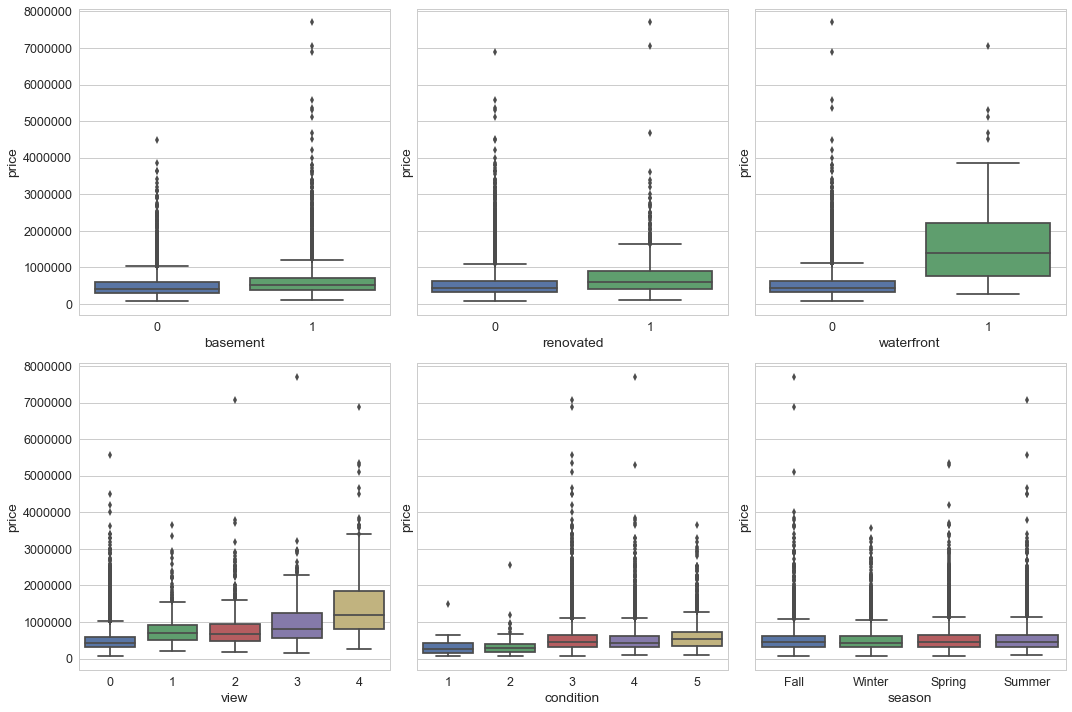

In [411]:
# Plots for Categorical variables

# Since zipcode is a categorical variable with a very high number of unique values, dummy encoding them during the regression
# stage will not be a feasible and viable option in addition to model estimation complexity

sns.set_style("whitegrid")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', figsize=(15,10))

sns.boxplot(x="bedrooms", y="price", data=KingCounty, ax=ax1)
sns.boxplot(x="bathrooms", y="price", data=KingCounty, ax=ax2)
sns.boxplot(x="floors", y="price", data=KingCounty, ax=ax3)
sns.boxplot(x="grade", y="price", data=KingCounty, ax=ax4)

fig.tight_layout()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey='row', figsize=(15,10))
sns.boxplot(x="basement", y="price", data=KingCounty, ax=ax1)
sns.boxplot(x="renovated", y="price", data=KingCounty, ax=ax2)
sns.boxplot(x="waterfront", y="price", data=KingCounty, ax=ax3)
sns.boxplot(x="view", y="price", data=KingCounty, ax=ax4)
sns.boxplot(x="condition", y="price", data=KingCounty, ax=ax5) 
sns.boxplot(x="season", y="price", data=KingCounty, ax=ax6)

fig.tight_layout()

#### We can observe that number of bedrooms, bathrooms, floors and the ranking of grade, view and condition can affect the price in a positively correlated manner. 

#### We can also oberserve that the IQR range is significantly broader for when waterfront is present and the house has been renovated versus when those characteristics not present.

### Collinearity Analysis of the Independent Variables for regression feature selection
Correlation Matrix of the variables using a heat map

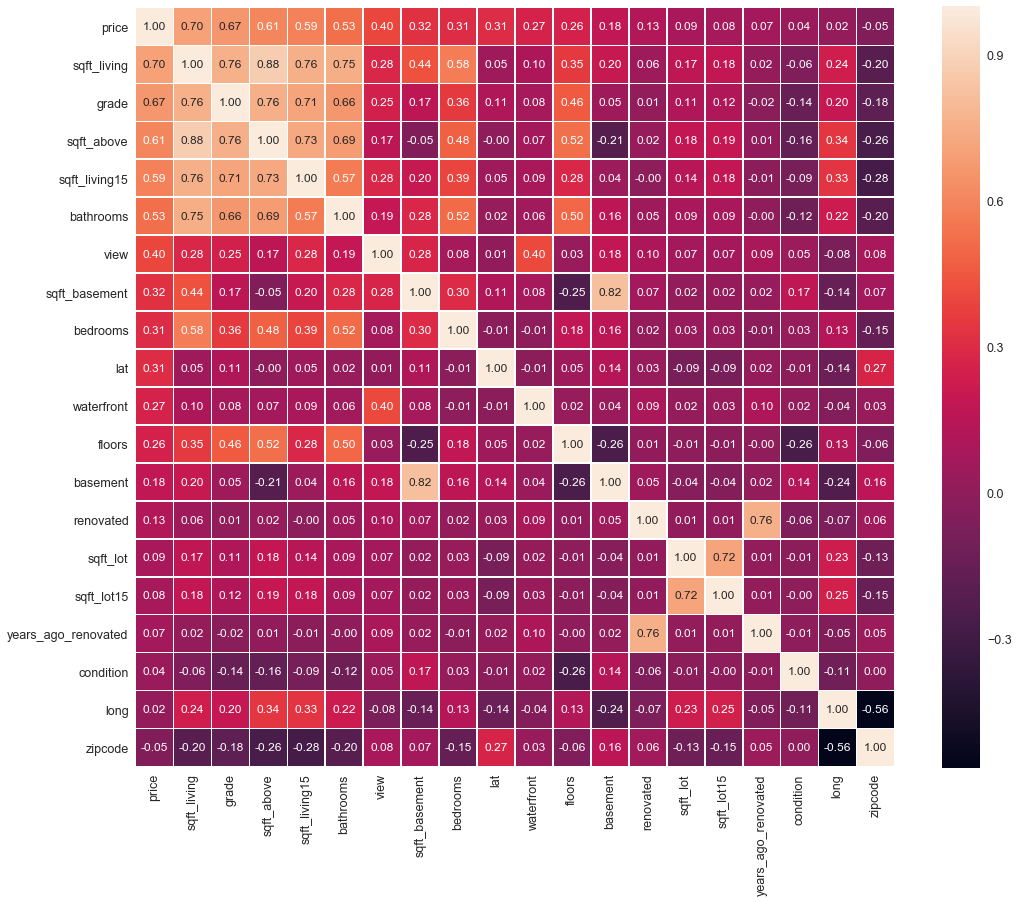

In [1103]:
# Correlation matrix between predictors and price (ranked).
# number of variables for heatmap
k = 20
matrix = KingCounty.corr()
cols = matrix.nlargest(k,'price')['price'].index
cm = np.corrcoef(KingCounty[cols].values.T)
sb.set(font_scale=1.25)
f,ax = plt.subplots(figsize=(17, 14))
sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', ax=ax, annot_kws={'size': 12}, linewidths=.7, yticklabels=cols.values, xticklabels=cols.values)


#### Variables sqft_living, sqft_above and sqft_living15 are significantly correlated with price. sqft_living is the highest correlated variable with price but sqft_living15 and sqft_above are significantly correlated (collinearity) with sqft_living and each other. If we are to use sqft_living as one of the features for the model, we would not consider these other collinear variables as features.

#### We will now look at how sqft_basement and years_ago_renovated are correlated

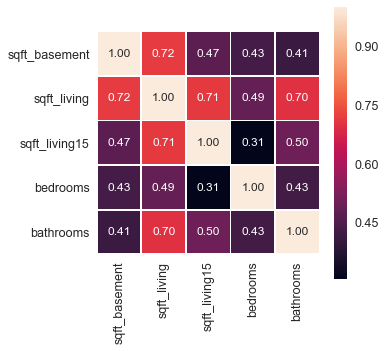

In [413]:
# Correlation matrix between predictors and sqft_basement (ranked).
# number of variables for heatmap
k = 5
matrix = KingCounty.query("basement != 0 ").corr()
cols = matrix.nlargest(k,'sqft_basement')['sqft_basement'].index
cm = np.corrcoef(KingCounty.query("basement != 0 ")[cols].values.T)
sb.set(font_scale=1.25)
f,ax = plt.subplots(figsize=(5, 5))
sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', ax=ax, annot_kws={'size': 12}, linewidths=.7, yticklabels=cols.values, xticklabels=cols.values)


#### sqft_basement is significantly correlated with sqft_living so we will not consider sqft_basement to input as a feature in the model

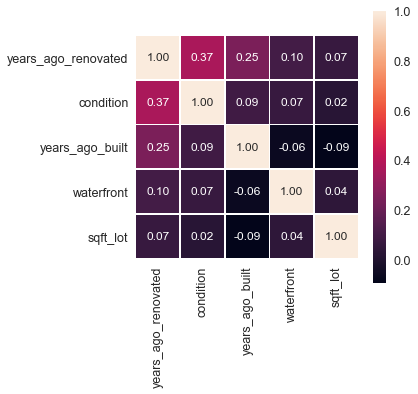

In [414]:
# Correlation matrix between predictors and years_ago_renovated (ranked).
# number of variables for heatmap
k = 5
matrix = KingCounty.query("renovated != 0 ").corr()
cols = matrix.nlargest(k,'years_ago_renovated')['years_ago_renovated'].index
cm = np.corrcoef(KingCounty.query("renovated != 0 ")[cols].values.T)
sb.set(font_scale=1.25)
f,ax = plt.subplots(figsize=(5, 5))
sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', ax=ax, annot_kws={'size': 12}, linewidths=.7, yticklabels=cols.values, xticklabels=cols.values)


#### years_ago_renovated does not seem to be a collinear variable. This variable has the value 0 when house is not renovated so we will keep both the renovated (flag) variable and years_ago_renovated as potential features.

# Multiple Linear Regression

In [938]:
# Drop the collinear and non-linear-to-price variables 
KingCounty_Regression = KingCounty.drop(['sqft_above', 'sqft_living15', 'sqft_basement', 'zipcode', 'sqft_lot', 'sqft_lot15', 'years_ago_built'], axis=1)

# Potential feature data 
feature_data = KingCounty_Regression.drop("price", axis=1)
target_data = KingCounty_Regression["price"]

# Get dummy values for the categorical variable features
# Initial categorical variables: bedrooms, floors, waterfront, view, condition, basement, renovated and season
# Here, the only variable that requires dummy encoding is the season variable
# bedrooms, floors, condition and view are on a linear scale i.e a value of 2 is greater than 1 etc
# waterfront, view, basement and renovated are already binary variables so no encoding required
feature_data = pd.get_dummies(data=feature_data, columns=['season'])

print(feature_data.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'lat', 'long', 'renovated', 'years_ago_renovated',
       'basement', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')


### Features Foward Selection

In [863]:
# First iteration with a baseline R-squared of 0

baseline = 0
r2_adj_max_feature = ""
feature_pool = feature_data.columns.tolist()

for feature in feature_pool:
    feature_data_temp = pd.DataFrame(feature_data[feature])
    reg = linear_model.LinearRegression()
    reg.fit(feature_data_temp, target_data)
    r2 = reg.score(feature_data_temp, target_data)
    r2_adj = 1 - (1-r2)*(len(target_data)-1) / (len(target_data) - feature_data_temp.shape[1]-1)   

    if r2_adj > baseline:
        baseline = r2_adj
        r2_adj_max_feature = feature

print("We can improve R-squared to %.5f by including %s" % (baseline, r2_adj_max_feature))

We can improve R-squared to 0.49283 by including sqft_living


In [864]:
# Function for determining if adding a feature improves the R-squared value for the model

def feature_selection(feature_pool, baseline):
    
    r2_adj_max_feature = ""
    
    for feature in feature_pool:
        kept_features_temp = kept_features[:]
        kept_features_temp.append(feature)
        feature_data_temp = pd.DataFrame(feature_data[kept_features_temp])
        reg_up = linear_model.LinearRegression()
        reg_up.fit(feature_data_temp, target_data)
    
        r2_up = reg_up.score(feature_data_temp, target_data)
        r2_adj_up = 1 - (1-r2_up)*(len(target_data)-1) / (len(target_data) - feature_data_temp.shape[1]-1)
    
        if r2_adj_up > baseline:
            baseline = r2_adj_up
            r2_adj_max_feature = feature
        
    print("We can improve R-squared to %.5f by including %s" % (baseline, r2_adj_max_feature))
    
    return baseline

In [865]:
# Iteration 2
baseline = 0.49283
kept_features = ["sqft_living"]
feature_pool.remove("sqft_living")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.56598 by including lat


In [866]:
# Iteration 3
baseline = 0.56598 
kept_features = ["sqft_living", "lat"]
feature_pool.remove("lat")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.60944 by including view


In [867]:
# Iteration 4
baseline = 0.60944
kept_features = ["sqft_living", "lat", "view"]
feature_pool.remove("view")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.63589 by including grade


In [868]:
# Iteration 5
baseline = 0.63589
kept_features = ["sqft_living", "lat", "view", "grade"]
feature_pool.remove("grade")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.65312 by including waterfront


In [869]:
# Iteration 6
baseline = 0.65312
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront"]
feature_pool.remove("waterfront")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.66217 by including condition


In [870]:
# Iteration 7
baseline = 0.66217
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition"]
feature_pool.remove("condition")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.66833 by including long


In [871]:
# Iteration 8
baseline = 0.66833
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition", "long"]
feature_pool.remove("long")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.67245 by including renovated


In [872]:
# Iteration 9
baseline = 0.67245
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition", "long", "renovated"]
feature_pool.remove("renovated")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.67618 by including bedrooms


In [873]:
# Iteration 10
baseline = 0.67618
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition", "long", "renovated", "bedrooms"]
feature_pool.remove("bedrooms")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.67734 by including season_Spring


In [874]:
# Iteration 11
baseline = 0.67734
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition", "long", "renovated", "bedrooms", "season_Spring"]
feature_pool.remove("season_Spring")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.67815 by including years_ago_renovated


In [875]:
# Iteration 12
baseline = 0.67815
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition", "long", "renovated", "bedrooms", "season_Spring", "years_ago_renovated"]
feature_pool.remove("years_ago_renovated")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.67861 by including basement


In [876]:
# Iteration 13
baseline = 0.67861 
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition", "long", "renovated", "bedrooms", "season_Spring", "years_ago_renovated", "basement"]
feature_pool.remove("basement")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.67918 by including floors


In [878]:
# Iteration 14
baseline = 0.67918
kept_features = ["sqft_living", "lat", "view", "grade", "waterfront", "condition", "long", "renovated", "bedrooms", "season_Spring", "years_ago_renovated", "basement", "floors"]
feature_pool.remove("floors")
baseline = feature_selection(feature_pool, baseline)

We can improve R-squared to 0.67919 by including bathrooms


#### The R-Squared value does not improve after adding a 15th feature 
#### Our final feature list is therefore reduced to:

In [939]:
feature_data_ols = pd.get_dummies(data=KingCounty_Regression, columns=['season'])
feature_data_ols = feature_data_ols.drop(["season_Fall", "season_Winter", "season_Summer"], axis=1)

### OLS Based on Features Selected using Forward Selection

In [940]:
model = ols("price ~ sqft_living + lat + view + grade + waterfront + condition + long + renovated + bedrooms + season_Spring + years_ago_renovated + basement + floors",
            data = feature_data_ols).fit()
print(model.summary())
print("R-squared is %.4f" % model.rsquared)
print("R-squared adjusted is %.4f" % model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     3521.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:20:41   Log-Likelihood:            -2.9531e+05
No. Observations:               21613   AIC:                         5.907e+05
Df Residuals:                   21599   BIC:                         5.908e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.921e+07   1

### Evaluate Model Assumptions before interpreting OLS summary above
    - The residuals of the model should be nearly normal
    - The variability of the residuals should be nearly constant
    - The residuals are independent
    - Each variable should be linearly related to the outcome

### Check Residuals Normality

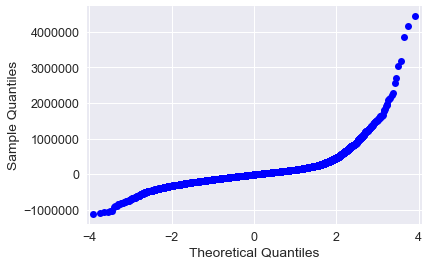

In [941]:
# Generate a normality (Quartiles) plot
res = model.resid
sm.graphics.qqplot(res)
plt.show()

#### The residuals are not nearly normal as identified by the curve characteristic of the plot above. 

#### Lets look at the residual plot for the highest correlated and R-Squared contributer sqft_living feature:

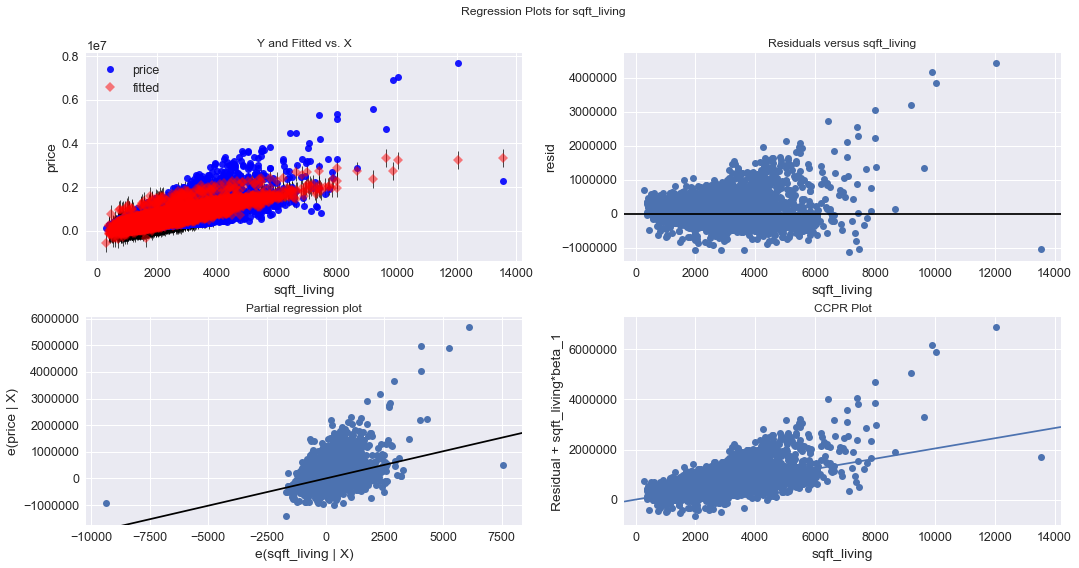

In [942]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)

#### We can observe that there are some extreme outliers for this feature's residuals. 

#### Let us look at the scatter plot for this feature against price again:

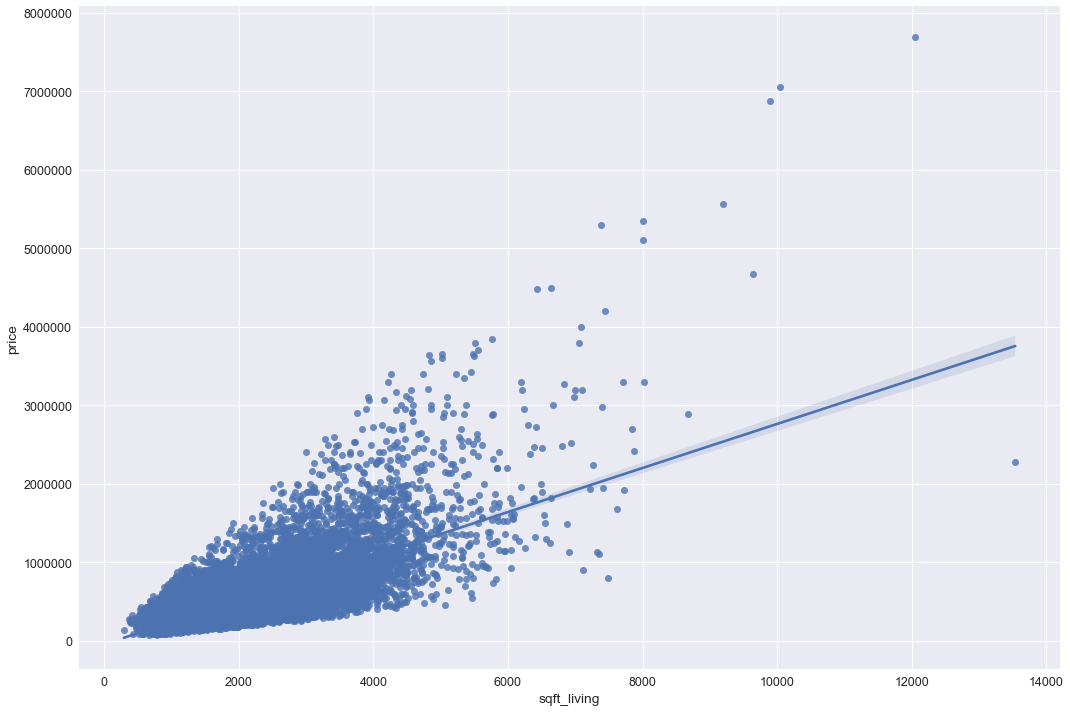

In [943]:
# Plot for sqft_living vs price
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
sns.regplot(x="sqft_living", y="price", data=KingCounty_Regression, truncate=True, ax=ax1)
fig.tight_layout()

#### The outliers grow very distant past the 2 million mark and past 6000sqft. Let's Remove these outliers and look at the plot again

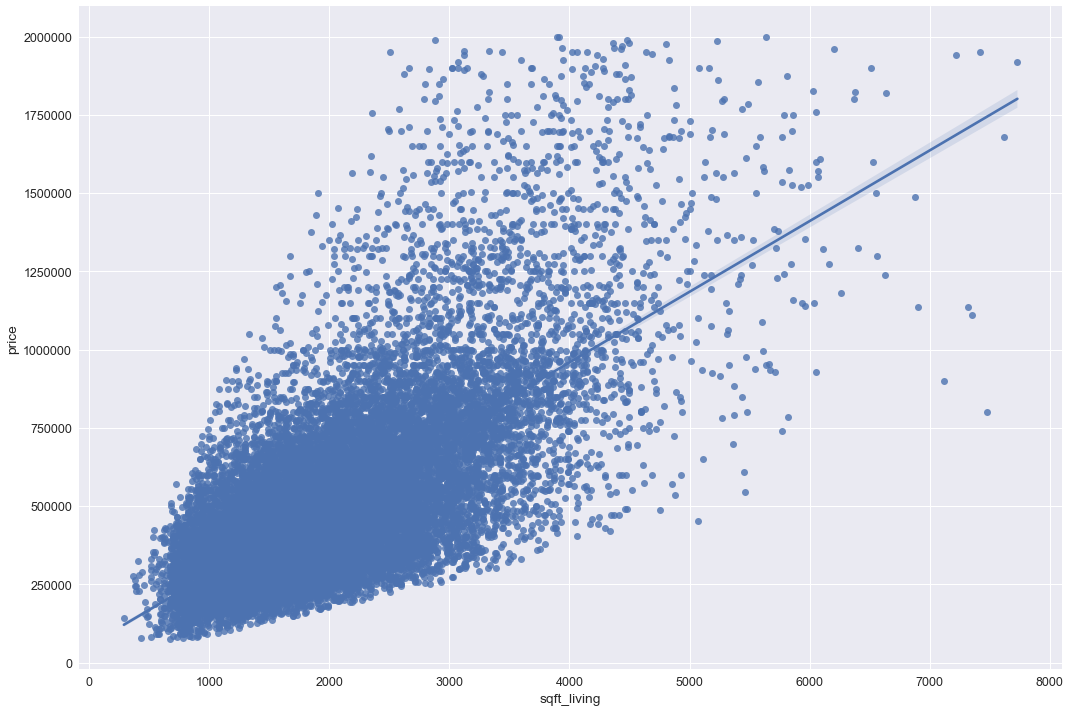

In [944]:
KingCounty_Regression = KingCounty_Regression.query('sqft_living < 8000 & price < 2000000')
# Plot for sqft_living vs price
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
sns.regplot(x="sqft_living", y="price", data=KingCounty_Regression, truncate=True, ax=ax1)
fig.tight_layout()

#### The outliers grow very distant past the 1.3 million and 6000sqft mark. Let's Remove these outliers and look at the plot again

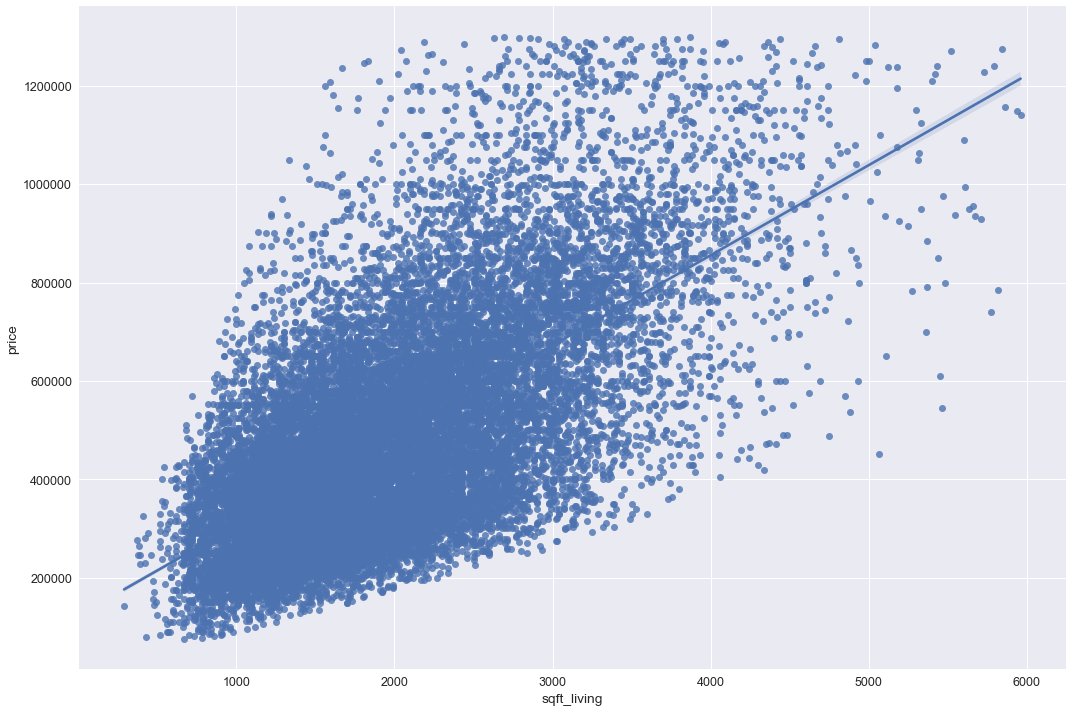

In [945]:
KingCounty_Regression = KingCounty_Regression.query('sqft_living < 6000 & price < 1300000')
# Plot for sqft_living vs price
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
sns.regplot(x="sqft_living", y="price", data=KingCounty_Regression, truncate=True, ax=ax1)
fig.tight_layout()

#### Lets run the OLS regression again with the outliers removed and check the model assumptions

In [947]:
feature_data_ols = pd.get_dummies(data=KingCounty_Regression, columns=['season'])
feature_data_ols = feature_data_ols.drop(["season_Fall", "season_Winter", "season_Summer"], axis=1)
model = ols("price ~ sqft_living + lat + view + grade + waterfront + condition + long + renovated + bedrooms + season_Spring + years_ago_renovated + basement + floors",
            data = feature_data_ols).fit()
print(model.summary())
print("R-squared is %.4f" % model.rsquared)
print("R-squared adjusted is %.4f" % model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3325.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:22:35   Log-Likelihood:            -2.7442e+05
No. Observations:               20807   AIC:                         5.489e+05
Df Residuals:                   20793   BIC:                         5.490e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.738e+07   8

### Check Residuals Normality - Iteration 2

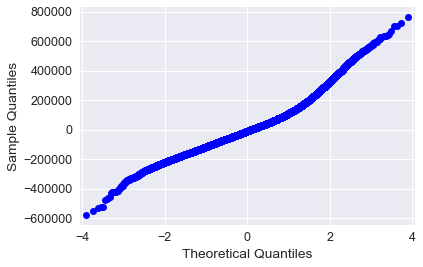

In [948]:
# Generate a normality (Quartiles) plot
res = model.resid
sm.graphics.qqplot(res)
plt.show()

#### The residuals are almost nearly normal other than slight dipping curve between the 0 and 2 theoritical quantiles. We will analyze what feature could be causing this by looking at their residual plots.

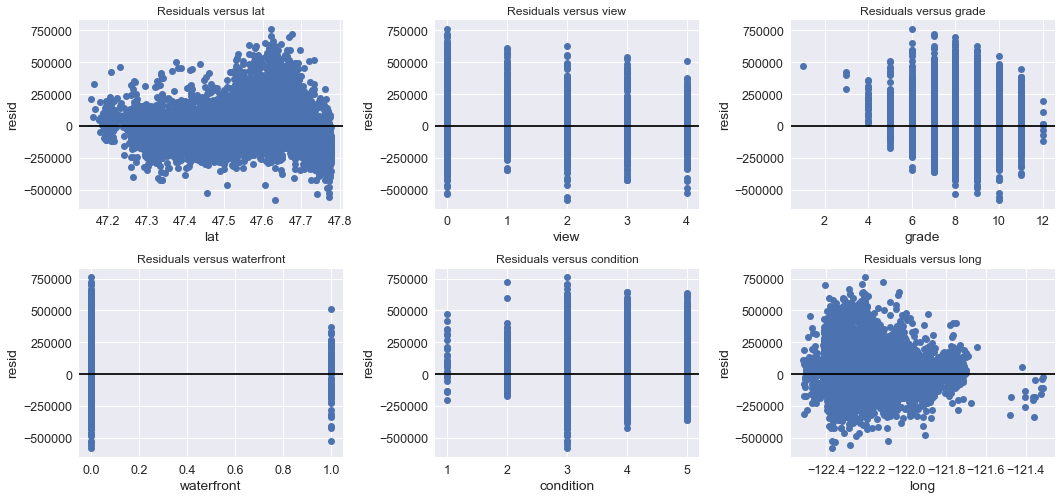

In [949]:

def plot_residuals (f1, f2, f3, f4, f5, f6, model):
    fig = plt.figure(figsize=(15,10))

    exog_idx = f1
    exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, model.model)
    model = maybe_unwrap_results(model)
    x1 = model.model.exog[:, exog_idx]
    ax = fig.add_subplot(3,3,1)
    ax.plot(x1, model.resid, 'o')
    ax.axhline(y=0, color='black')
    ax.set_title('Residuals versus %s' % exog_name, fontsize='large')
    ax.set_xlabel(exog_name)
    ax.set_ylabel("resid")

    exog_idx = f2
    exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, model.model)
    model = maybe_unwrap_results(model)
    x1 = model.model.exog[:, exog_idx]
    ax = fig.add_subplot(3,3,2)
    ax.plot(x1, model.resid, 'o')
    ax.axhline(y=0, color='black')
    ax.set_title('Residuals versus %s' % exog_name, fontsize='large')
    ax.set_xlabel(exog_name)
    ax.set_ylabel("resid")

    exog_idx = f3
    exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, model.model)
    model = maybe_unwrap_results(model)
    x1 = model.model.exog[:, exog_idx]
    ax = fig.add_subplot(3,3,3)
    ax.plot(x1, model.resid, 'o')
    ax.axhline(y=0, color='black')
    ax.set_title('Residuals versus %s' % exog_name, fontsize='large')
    ax.set_xlabel(exog_name)
    ax.set_ylabel("resid")

    exog_idx = f4
    exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, model.model)
    model = maybe_unwrap_results(model)
    x1 = model.model.exog[:, exog_idx]
    ax = fig.add_subplot(3,3,4)
    ax.plot(x1, model.resid, 'o')
    ax.axhline(y=0, color='black')
    ax.set_title('Residuals versus %s' % exog_name, fontsize='large')
    ax.set_xlabel(exog_name)
    ax.set_ylabel("resid")

    exog_idx = f5
    exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, model.model)
    model = maybe_unwrap_results(model)
    x1 = model.model.exog[:, exog_idx]
    ax = fig.add_subplot(3,3,5)
    ax.plot(x1, model.resid, 'o')
    ax.axhline(y=0, color='black')
    ax.set_title('Residuals versus %s' % exog_name, fontsize='large')
    ax.set_xlabel(exog_name)
    ax.set_ylabel("resid")

    exog_idx = f6
    exog_name, exog_idx = utils.maybe_name_or_idx(exog_idx, model.model)
    model = maybe_unwrap_results(model)
    x1 = model.model.exog[:, exog_idx]
    ax = fig.add_subplot(3,3,6)
    ax.plot(x1, model.resid, 'o')
    ax.axhline(y=0, color='black')
    ax.set_title('Residuals versus %s' % exog_name, fontsize='large')
    ax.set_xlabel(exog_name)
    ax.set_ylabel("resid")

    fig.tight_layout()

plot_residuals("lat","view","grade","waterfront","condition","long", model)

#### There are outliers for grade and long that don't cluster around the 0 residual line. The lat feature is skewed bottom right where there are no residuals around 0 above it . Let us look at the remaining features residual plots

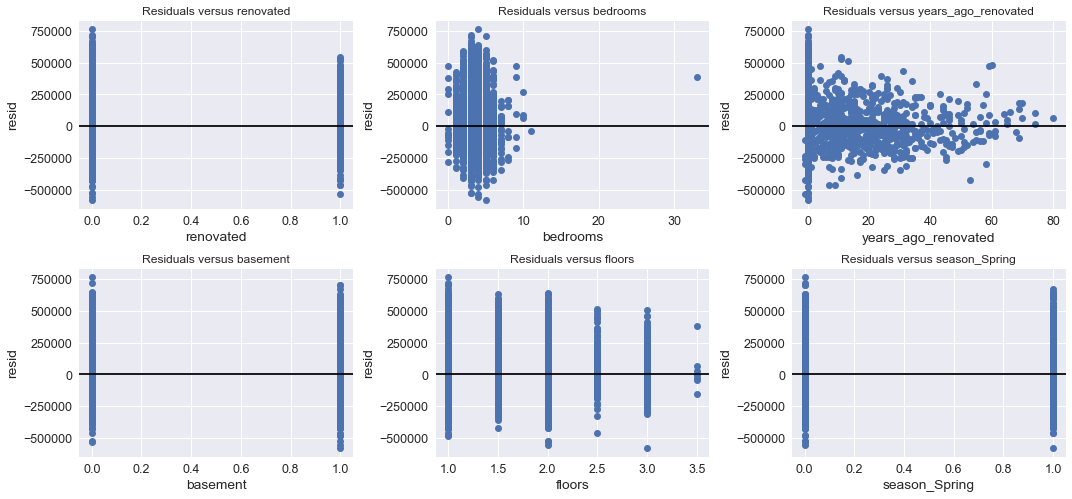

In [951]:
plot_residuals("renovated","bedrooms","years_ago_renovated","basement","floors","season_Spring", model)

#### There is a trend forming for bedrooms where there is a dip after 6 bedrooms and an extreme outlier past 30 bedrooms. years_ago_renovated when renovated = 1 seem to be clustered around 0 residual line in a clustered fashion so no conerns there. 

#### Given the above, we will go ahead and remove the lat feature and outliers for grade, long and bedrooms feature from our model and check for model assumptions again.

In [1102]:
KingCounty_Regression = KingCounty_Regression.query('grade > 4')
KingCounty_Regression = KingCounty_Regression.query('long < -121.6')
KingCounty_Regression = KingCounty_Regression.query('bedrooms < 6')
feature_data_ols = pd.get_dummies(data=KingCounty_Regression, columns=['season'])
feature_data_ols = feature_data_ols.drop(["season_Fall", "season_Winter", "season_Summer"], axis=1)

model = ols("price ~ sqft_living + view + grade + waterfront + condition + long + renovated + bedrooms + season_Spring + years_ago_renovated + basement + floors",
            data = feature_data_ols).fit()
print(model.summary())
print("R-squared is %.4f" % model.rsquared)
print("R-squared adjusted is %.4f" % model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2075.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:21:15   Log-Likelihood:            -2.7328e+05
No. Observations:               20472   AIC:                         5.466e+05
Df Residuals:                   20459   BIC:                         5.467e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.808e+07   1

### Check Residuals Normality - Iteration 3

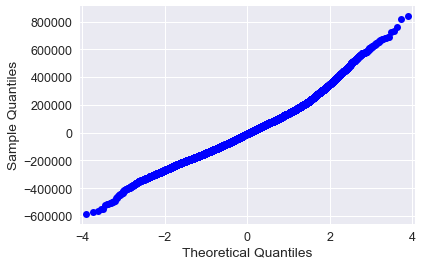

In [969]:
# Generate a normality (Quartiles) plot
res = model.resid
sm.graphics.qqplot(res)
plt.show()

#### The residuals are now nearly normal. We will now continue checking for the remaining model assumptions before interpreting the results

### Check Variability of Residuals against Fitted Values

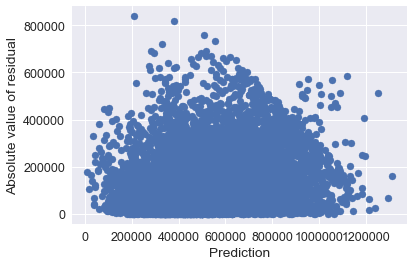

In [970]:
# Residuals vs prediction
predictions = model.predict(feature_data_ols)
plt.scatter(predictions, np.abs(res))
plt.xlabel("Prediction")
plt.ylabel("Absolute value of residual")
plt.show()

#### We can observe the variability of the reisiduals is almost constant

### Check Residuals in Order of Collection are Independent

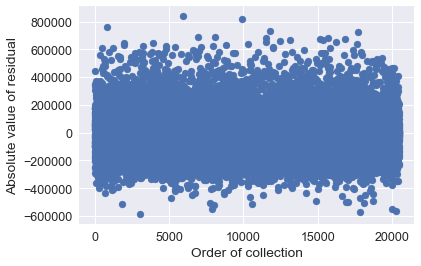

In [971]:
# Residuals by order of collection
plt.scatter(np.arange(res.__len__()), res)
plt.xlabel("Order of collection")
plt.ylabel("Absolute value of residual")
plt.show()

#### We can observe that no trend exists for the residuals in the order they are collected hence the residuals are independent.

### Check each variable is linearly related to outcome

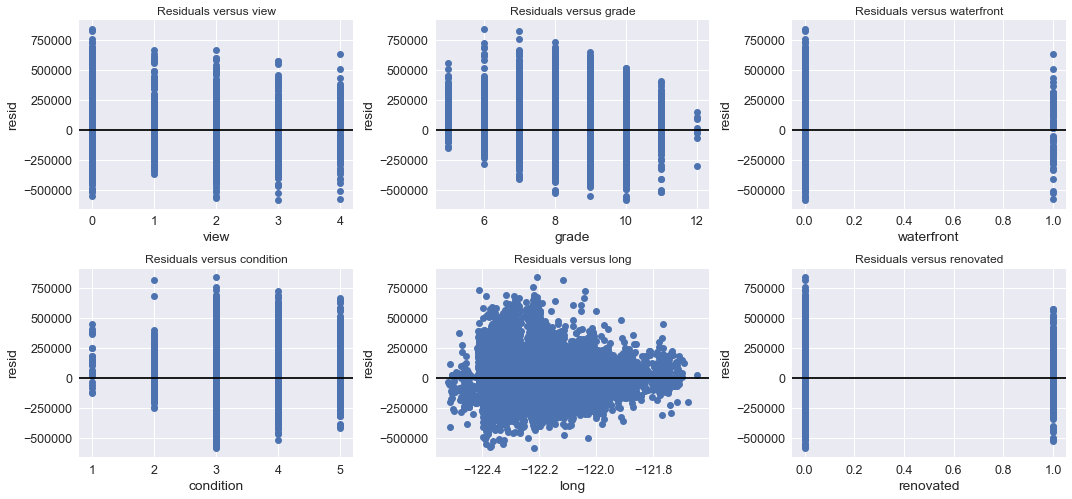

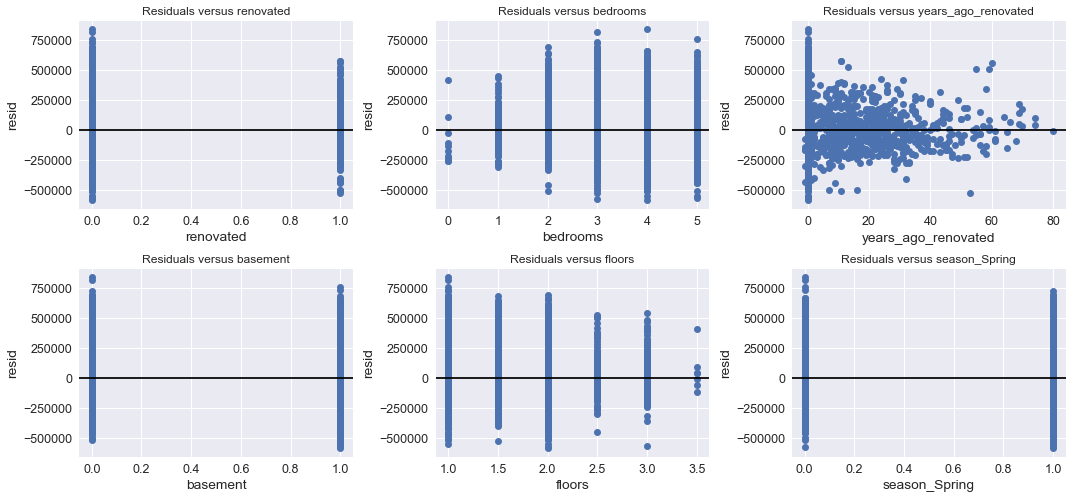

In [972]:
plot_residuals("view","grade","waterfront","condition","long", "renovated", model)
plot_residuals("renovated","bedrooms","years_ago_renovated","basement","floors","season_Spring", model)

#### There seem to be no significant trends in the above plots.

# Cross-validation

In [980]:
# Lets evaluate the model performance and any overfitting by splitting the data into training and validation sets

def predict_train_test(data):
    feature_data_cross = data.drop("price", axis=1)
    target_data_cross = data["price"]

    mask = np.random.rand(len(feature_data_cross)) < 0.7
    train_data = feature_data_cross[mask]
    test_data = feature_data_cross[~mask]

    train_target = target_data_cross[mask]
    test_target = target_data_cross[~mask]

    train_model = linear_model.LinearRegression()
    train_model.fit(train_data, train_target)

    training_rsq = train_model.score(train_data, train_target)
    training_rsq_adj = 1 - (1-training_rsq)*(len(train_target)-1) / (len(train_target) - train_data.shape[1]-1)

    print("Training R-squared (adjusted) is %.4f" % training_rsq_adj)

    training_predictions = train_model.predict(train_data)
    test_predictions = train_model.predict(test_data)

    mse_train = mean_squared_error(training_predictions, train_target)
    mse_test = mean_squared_error(test_predictions, test_target)

    print("MSE from the training set is %.4f" % math.sqrt(mse_train))
    print("MSE from the test set is %.4f" % math.sqrt(mse_test))

predict_train_test(feature_data_ols)

Training R-squared (adjusted) is 0.6765
MSE from the training set is 127939.8341
MSE from the test set is 129269.0535


#### The error from the test data set slightly deviates from that of the training data set so there might be some influence of overfitting.

### Lets check if the model performs better in a certain season

In [1029]:
feature_data_season = pd.get_dummies(data=KingCounty_Regression, columns=['season'])

# Winter
season_sales = feature_data_season.query("season_Spring != 1 & season_Summer != 1 & season_Fall != 1 & season_Winter != 0")
predict_train_test(season_sales)

Training R-squared (adjusted) is 0.6646
MSE from the training set is 128552.7360
MSE from the test set is 130152.6312


In [1056]:
# Spring
season_sales = feature_data_season.query("season_Spring != 0 & season_Summer != 1 & season_Fall != 1 & season_Winter != 1")
predict_train_test(season_sales)

Training R-squared (adjusted) is 0.6530
MSE from the training set is 132960.8685
MSE from the test set is 137597.0135


In [1098]:
# Summer
season_sales = feature_data_season.query("season_Spring != 1 & season_Summer != 0 & season_Fall != 1 & season_Winter != 1")
predict_train_test(season_sales)

Training R-squared (adjusted) is 0.7057
MSE from the training set is 124949.8663
MSE from the test set is 124123.5395


In [1100]:
# Fall
season_sales = feature_data_season.query("season_Spring != 1 & season_Summer != 1 & season_Fall != 0 & season_Winter != 1")
predict_train_test(season_sales)

Training R-squared (adjusted) is 0.6894
MSE from the training set is 124707.0063
MSE from the test set is 120232.3358


#### The R-squared value for the sales price prediction is the highest when the model is trainined and tested for the Summer data. The difference in error between the training and test data sets is minor signifying overfitting is not a major concern here

## Interpreting the Model

In [1101]:
print(model.summary())
print("R-squared is %.4f" % model.rsquared)
print("R-squared adjusted is %.4f" % model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2075.
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:18:01   Log-Likelihood:            -2.7328e+05
No. Observations:               20472   AIC:                         5.466e+05
Df Residuals:                   20459   BIC:                         5.467e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.808e+07   1

#### The R-squared adjusted value for the overall model is not very strong at only 0.55 but we saw with the analysis above that seasonality does affect the model performance where the summer season data produces an adjusted R-squared value of greater than 0.7. 

#### The condition number reported above has been minimalized by leaving out significant collinear variables out as model features compared to when all features were included in the model.

#### Analyzing the coefficients for the various predictors of house price, we can conclude that the price goes up when:
 - A good view is present and
 - The build quality of house is good (grade) and
 - There is a waterfront and or basement present and
 - The condition of the house is highly ranked and
 - The house is renovated and the renovation is recent and
 - The living space is large and
 - There are more floors and
 - The house is not further out east of Seattle
 - If it is on the market in the Spring season
 
#### Our Model is only valid to predict house prices upto 1.3M when the following conditions are true:
 - The living space of the house is within 8000 sqft
 - The grade of the house is better than 4
 - The number of bedrooms in the house are less than 6
 - The house is not farther out east (longitude > -121.6)